<a href="https://colab.research.google.com/github/KurtKalwin/Employee_Atrrition/blob/master/employeeattrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import plotly.tools as tls



In [0]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import (accuracy_score,log_loss,classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

import warnings
warnings.filterwarnings('ignore')

In [12]:
from google.colab import files
upload = files.upload()

In [13]:
attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [14]:
display(attrition.isnull())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
display(attrition.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

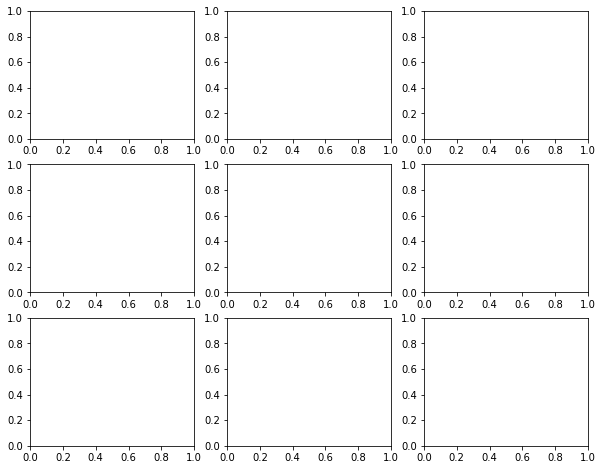

In [16]:
f, axes = plt.subplots(3, 3, figsize=(10,8), sharex=False ,sharey=False)

NameError: ignored

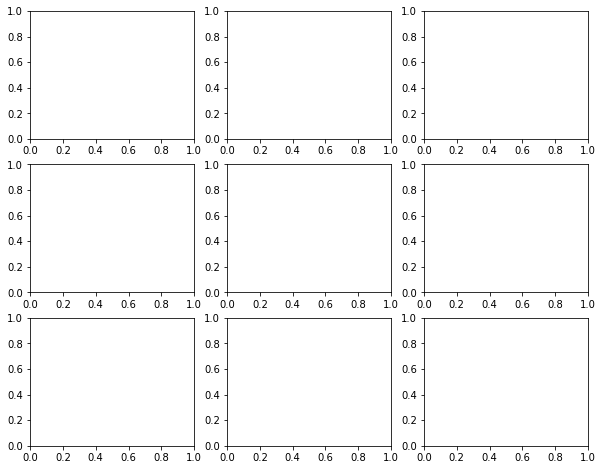

In [17]:
f, axes = plt.subplots(3, 3, figsize=(10,8), sharex=False ,sharey=False)


s = np.linspace(0,3,10)
cmap = sns.cubehelix_palette(start=0.0,light=1,as_cmap=True)


x = attrittion['Age'].values
y = attrittion['TotalWorkingYears'].values
sns.kdeplot(x,y, cmap=cmap, shade=True ,cut=5, ax=axes[0,0])
axes[0,0].set(title= 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.3, light=1, as_cmap=True)

x = attrittion['Age'].values
y = attrittion['DailyRate'].values
sns.kdeplot(x,y, cmap=cmap, shade=True , ax=axes[0,1])
axes[0,1].set(title= 'Age against DailyRate')

cmap = sns.cubehelix_palette(start=0.5, light=1, as_cmap=True)

x = attrittion['YearsInCurrentRole'].values
y = attrittion['Age'].values
sns.kdeplot(x,y, cmap=cmap, shade=True , ax=axes[0,2])
axes[0,2].set(title= 'Years in Role against Age')

cmap = sns.cubehelix_palette(start=0.7, light=1, as_cmap=True)

x = attrittion['DailyRate'].values
y = attrittion['DistanceFromHome'].values
sns.kdeplot(x,y, cmap=cmap, shade=True , ax=axes[1,0])
axes[1,0].set(title= 'Daily rate against Distance from Home')

cmap = sns.cubehelix_palette(start=1.3, light=1, as_cmap=True)


x = attrittion['DailyRate'].values
y = attrittion['JobSatisfaction'].values
sns.kdeplot(x,y, cmap=cmap, shade=True , ax=axes[1,1])
axes[1,1].set(title= 'Daily rate against Job Satisfaction')

cmap = sns.cubehelix_palette(start=1.5, light=1, as_cmap=True)

x = attrittion['YearsAtCompany'].values
y = attrittion['JobSatisfaction'].values
sns.kdeplot(x,y, cmap=cmap, shade=True , ax=axes[1,2])
axes[1,2].set(title= 'Years At Company against Job Satisfaction')

cmap = sns.cubehelix_palette(start=1.7, light=1, as_cmap=True)

x = attrittion['YearsAtCompany'].values
y = attrittion['DailyRate'].values
sns.kdeplot(x,y, cmap=cmap, shade=True , ax=axes[2,0])
axes[2,0].set(title= 'Years at Company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.3, light=1, as_cmap=True)

x = attrittion['RelationshipSatisfaction'].values
y = attrittion['YearsWithCurrManager'].values
sns.kdeplot(x,y, cmap=cmap, shade=True ,cut=5, ax=axes[2,1])
axes[2,1].set(title= 'RelationshipSatisfaction against YearsWithCurrManager')

cmap = sns.cubehelix_palette(start=2.5, light=1, as_cmap=True)

x = attrittion['WorkLifeBalance'].values
y = attrittion['JobSatisfaction'].values
sns.kdeplot(x,y, cmap=cmap, shade=True , ax=axes[2,2])
axes[2,2].set(title= 'WorkLifeBalance against JobSatisfaction')

f.tight_layout()






In [18]:
target_map = {'Yes':1,'No':0}
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])
attrition["Attrition_numerical"]

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_numerical, Length: 1470, dtype: int64

In [19]:
numerical = ['Age','DailyRate' ,'DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement'
,'JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction'
,'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion'
,'YearsWithCurrManager']

data1 = [go.Heatmap(
                  z=attrition[numerical].astype(float).corr().values,
                  x=attrition[numerical].columns.values,
                  y=attrition[numerical].columns.values,
                  colorscale='Viridis',
                  reversescale = False,
                  
          
                  )
]

layout1 = go.Layout(
    title='correlation of numerical values',
    xaxis =dict(ticks='', nticks=36),
    yaxis =dict(ticks=''),
    width = 900, height = 700,
                    )
          

fig = go.Figure(data= data1, layout= layout1)
py.iplot(fig, filename='labelled-heatmap')
#sns.heatmap(data='data',cmap='coolwarn')






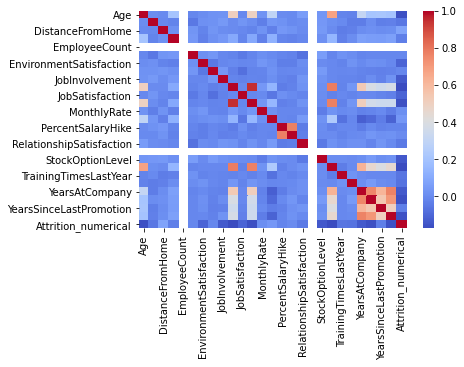

In [20]:
sns.heatmap(attrition.corr(),cmap='coolwarm')

In [21]:
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
data = [
    go.Heatmap(
        z= attrition[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=attrition[numerical].columns.values,
        y=attrition[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

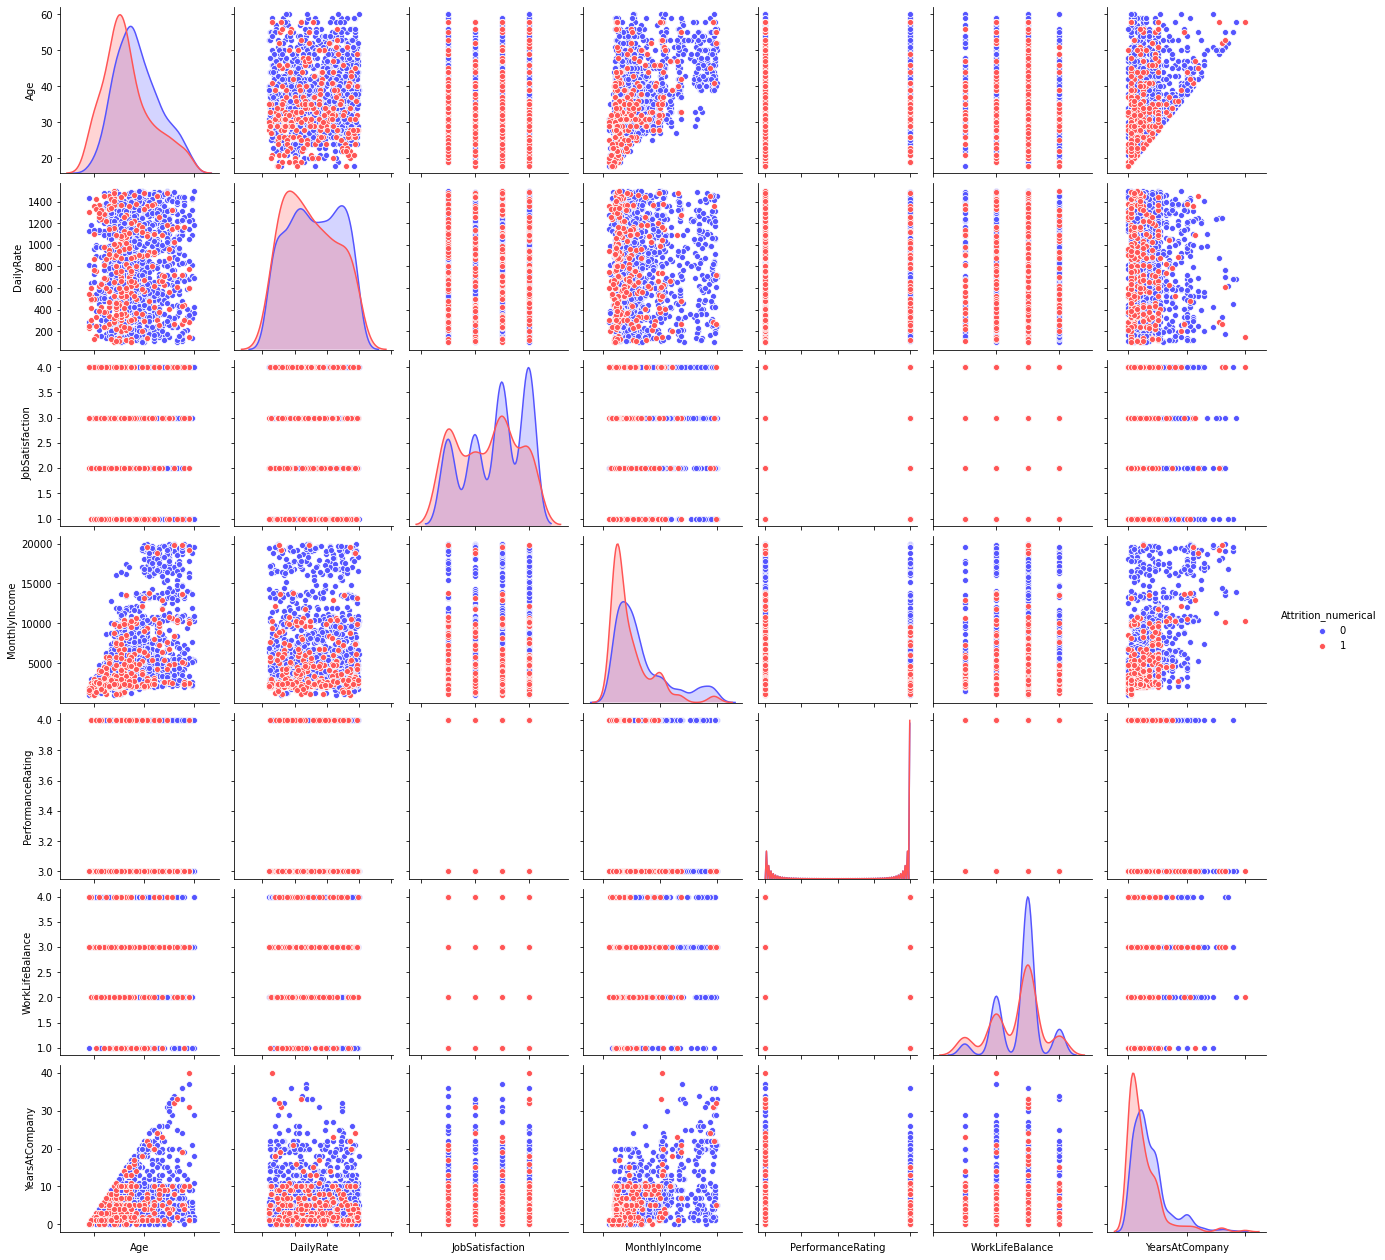

In [22]:
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

g =sns.pairplot(attrition[numerical],hue='Attrition_numerical', palette='seismic', diag_kind='kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])



In [0]:
#attrition = attrition.drop(['Attrition_numerical'], axis=1)


categorical =[]
for col, value in attrition.iteritems():
  if value.dtype =='object':
    categorical.append(col)

numerical = attrition.columns.difference(categorical)


In [24]:
# Drop the Attrition_numerical column from attrition dataset first - Don't want to include that
attrition = attrition.drop(['Attrition_numerical'], axis=1)

# Empty list to store columns with categorical data
categorical = []
for col, value in attrition.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = attrition.columns.difference(categorical)
#numerical = numerical.drop(['Attrition_numerical'])
numerical

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [0]:
attrition_cat = attrition[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1)

In [26]:
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


In [27]:
attrition_num = attrition[numerical]
attrition_num

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


In [28]:
attrition_final = pd.concat([attrition_num,attrition_cat], axis=1)
attrition_final

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0


In [29]:
target_map = {'Yes':1,'No':0}
target = attrition['Attrition'].apply(lambda x : target_map[x])
target.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [30]:
data = [go.Bar(
    x = attrition["Attrition"].value_counts().index.values,
    y = attrition["Attrition"].value_counts().values
        )]
py.iplot(data,filename='basic-bar')

In [0]:
#!pip install scikit-learn
#import sklearn as sklearn

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

train,test,target_train,target_val = train_test_split(attrition_final,target,train_size=0.80,random_state=0)

In [32]:
oversampler = SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(train,target_train)
smote_target

array([0, 0, 0, ..., 1, 1, 1])

In [0]:
#seed = 0 

#rf_params = {
   # 'n_job' : -1,
   # 'n_estimators' : 1000,
    #'max_features' : 0.3,
    #'max_depth': 4,
    #'min_samples_leaf': 2,
    #'max_features':'sqrt',
    #'random_state' : 'seed',
   #3 'verbose': 0

#}

In [0]:
seed=0
rf = RandomForestClassifier(n_jobs='none',n_estimators = 1000,max_features = 0.3, max_depth= 4,min_samples_leaf= 2 ,random_state = 'seed',verbose= 0 )

In [34]:
rf.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

ValueError: ignored

In [35]:
rf_predictions = rf.predict(test)
print("Predictions finished")

AttributeError: ignored